In [ ]:
%pip install -r requirements.txt

In [6]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
df = pd.read_csv("./data.csv",delimiter=";")
df = df.dropna(axis = 0)





In [9]:
%pip install dataprep

  Using cached dataprep-0.4.1-py3-none-any.whl (3.5 MB)
  Obtaining dependency information for aiohttp<4.0,>=3.6 from https://files.pythonhosted.org/packages/4c/b8/5c5efbb1d3cb1da3612b8e309e8e31b602ee9c5cca8e41961db385fc9d00/aiohttp-3.8.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached aiohttp-3.8.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.7 kB)
  Using cached bokeh-2.4.3-py3-none-any.whl (18.5 MB)
  Using cached Bottleneck-1.3.7-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (358 kB)
  Using cached dask-2.30.0-py3-none-any.whl (848 kB)
  Using cached Flask-1.1.4-py2.py3-none-any.whl (94 kB)
  Using cached Flask_Cors-3.0.10-py2.py3-none-any.whl (14 kB)
  Obtaining dependency information for ipywidgets<8.0,>=7.5 from https://files.pythonhosted.org/packages/dc/0f/efa0531c38e7651d7b229e4746ed83ddd286d0ad80a316b175a4b14e8c1c/ipywidgets-7.8.0-py2.py3-none-any.whl.metadata
  Us

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [8]:
from dataprep.eda import create_report
create_report(df)


ModuleNotFoundError: No module named 'dataprep'

In [18]:
df["Target"].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [ ]:
print(df["Target"].value_counts())
df_com_enrolled = df
for indice, linha in df.iterrows():
  if linha["Target"] == "Enrolled":
    df = df.drop(indice)

df["Target"].value_counts()


In [141]:
labels =["dropout","Graduete"]


list

In [ ]:
df.head().T

In [130]:
from bokeh.settings import convert_validation
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
normalizador = MinMaxScaler()
conversor = LabelEncoder()

x = df[['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']]
y = df["Target"]

normalizada = normalizador.fit_transform(x)
normalizada= pd.DataFrame(data = normalizada, columns = x.columns)

df["Target"] = conversor.fit_transform(df["Target"])
convertida = df["Target"]



In [103]:
from sklearn.model_selection import train_test_split
x_trein, x_test,y_trein, y_test = train_test_split(normalizada,convertida,test_size=0.3,random_state=42)

In [106]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_trein,y_trein)

GaussianNB()

In [109]:
print("naive bayes score: ",nb.score(x_test,y_test))

naive bayes score:  0.8475665748393021


              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1007
           1       0.84      0.90      0.87      1534

    accuracy                           0.84      2541
   macro avg       0.83      0.82      0.83      2541
weighted avg       0.84      0.84      0.84      2541

A acurácia é  0.8370720188902007


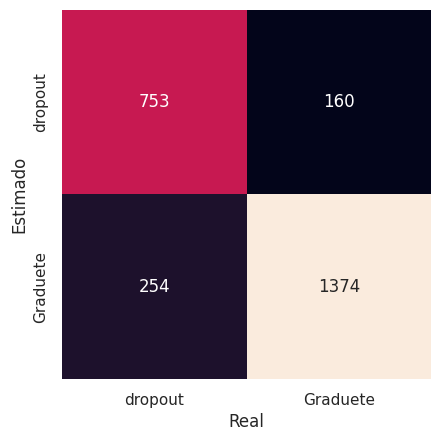

In [147]:
train_est_y = nb.predict(x_trein)

mat = confusion_matrix(y_trein, train_est_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Real')
plt.ylabel('Estimado');

print(classification_report(y_trein, train_est_y)) # mostra relatório
print('A acurácia é ',accuracy_score(train_est_y, y_trein)) # exibe acurácia



              precision    recall  f1-score   support

           0       0.84      0.73      0.79       414
           1       0.85      0.92      0.88       675

    accuracy                           0.85      1089
   macro avg       0.85      0.83      0.83      1089
weighted avg       0.85      0.85      0.85      1089

A acurácia é  0.8475665748393021


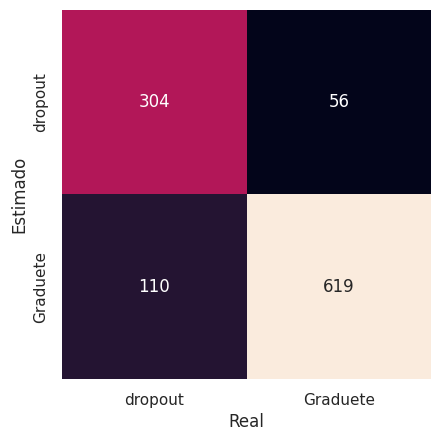

In [146]:
test_est_y = nb.predict(x_test)

mat = confusion_matrix(y_test, test_est_y)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Real')
plt.ylabel('Estimado');

print(classification_report(y_test, test_est_y)) # mostra relatório
print('A acurácia é ',accuracy_score(test_est_y, y_test)) # exibe acurácia